<a href="https://colab.research.google.com/github/nithyalakshmi-s/supervised-learning/blob/main/19MID0043_NITHYALAKSHMI_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TEXT MINING-DA1**


# **NITHYALAKSHMI**.**S** **19MID0043**

In [20]:
!pip3 install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
pip install requests beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import requests,re
from bs4 import BeautifulSoup


def review_scraper(url, page):
    url = f"{url}&pageNumber=2={page}"

    user_agent = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.'
    }
    response = requests.get(url=url, headers=user_agent)
    soup = BeautifulSoup(response.content, 'lxml')

    for review in soup.find_all('div', {'class': 'a-section review aok-relative'}):
        review_text = review.find('span', {'class': 'a-size-base review-text review-text-content'})
        print(review_text.text)

url ='https://www.amazon.in/LG-Inverter-Fully-Automatic-Loading-T70SKSF1Z/product-reviews/B08DF1Y7T7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
page = 1

review_scraper(url, page)



The installer was not patient enough to explain properly.He had forgotten about the appointment, se he arrived late and then he was in a rush. We tried to call him back for clarification but he never answers the call.


The switch panel should be behind the lid so that water doesn’t fall on it while loading


The spin in the washing tub leaves the cloths very damp, I am not satisfied with the spin funtion


Nice Products


nice working but washing powder is missing, market price se 2 se 3 thousand save hoga


Good


Good quality.Worth for the money.


Best washing machine...


Noise is very low and energy efficient ,Good option to buy.


Quality can be improved. Outer body is very thin looks like a low quality material.



In [114]:
import requests
from bs4 import BeautifulSoup

def review_scraper(url, page):
    user_agent = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.'
    }

    form_data = {
        'sortBy': '',
        'reviewerType': 'all_reviews',
        'pageNumber': str(page)
    }

    response = requests.post(url, headers=user_agent, data=form_data)
    soup = BeautifulSoup(response.content, 'lxml')

    for review_text in soup.find_all('span', {'class': 'a-size-base review-text review-text-content'}):
        cleaned_text = review_text.get_text(strip=True)
        print(cleaned_text)

def scrape_reviews_from_multiple_pages(url, num_pages):
    for page in range(1, num_pages + 1):
        print(f"Scraping reviews from page {page}:")
        review_scraper(url, page)
        print()

url = 'https://www.amazon.in/LG-Inverter-Fully-Automatic-Loading-T70SKSF1Z/product-reviews/B08DF1Y7T7'
num_pages = 58# Number of pages to scrape

scrape_reviews_from_multiple_pages(url, num_pages)


Scraping reviews from page 1:
The installer was not patient enough to explain properly.He had forgotten about the appointment, se he arrived late and then he was in a rush. We tried to call him back for clarification but he never answers the call.
The switch panel should be behind the lid so that water doesn’t fall on it while loading
The spin in the washing tub leaves the cloths very damp, I am not satisfied with the spin funtion
Nice Products
nice working but washing powder is missing, market price se 2 se 3 thousand save hoga
Good
Good quality.Worth for the money.
Best washing machine...
Noise is very low and energy efficient ,Good option to buy.
Quality can be improved. Outer body is very thin looks like a low quality material.

Scraping reviews from page 2:
Good Product by LG
Nice
Product ia good but delivery guy was asking 200 rupees extra to deliver it on second floor.
The washing machine is useful for four members in the family. It has no noise and easy to use. Installation is 

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def review_scraper(url, page):
    user_agent = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.'
    }

    form_data = {
        'sortBy': '',
        'reviewerType': 'all_reviews',
        'pageNumber': str(page)
    }

    response = requests.post(url, headers=user_agent, data=form_data)
    soup = BeautifulSoup(response.content, 'lxml')

    reviews = []

    for review_text in soup.find_all('span', {'class': 'a-size-base review-text review-text-content'}):
        cleaned_text = review_text.get_text(strip=True)
        reviews.append(cleaned_text)

    return reviews

def scrape_reviews_from_multiple_pages(url, num_pages):
    all_reviews = []

    for page in range(1, num_pages + 1):
        reviews = review_scraper(url, page)
        all_reviews.extend(reviews)

    return all_reviews

def save_reviews_to_excel(reviews, file_path):
    df = pd.DataFrame({'Reviews': reviews})
    df.to_excel(file_path, index=False)

url = 'https://www.amazon.in/LG-Inverter-Fully-Automatic-Loading-T70SKSF1Z/product-reviews/B08DF1Y7T7'
num_pages = 3  # Number of pages to scrape
output_file = 'reviews.xlsx'  # File path to save the reviews in Excel format

reviews = scrape_reviews_from_multiple_pages(url, num_pages)
save_reviews_to_excel(reviews, output_file)


In [26]:
import pandas as pd

# Custom list of stopwords
custom_stopwords = ['the', 'and', 'a', 'is', 'in', 'it', 'of', 'to', 'I', 'you', 'that', 'was', 'for', 'with', 'on', 'this', 'have', 'be', 'are', 'not', 'your', 'as', 'or', 'if', 'but', 'my', 'from', 'at', 'by', 'so', 'they', 'an', 'can', 'will', 'we', 'their', 'all', 'do', 'no', 'up', 'about', 'out', 'when', 'what', 'how', 'who', 'which', 'there', 'me', 'her', 'him', 'his', 'she', 'he', 'it\'s']


# Specify the path to the Excel file
excel_file = 'reviews.xlsx'

# Read the Excel file
df = pd.read_excel(excel_file)

# Convert 'Reviews' column values to strings
df['Reviews'] = df['Reviews'].astype(str)

# Function to remove stopwords from a review
def remove_stopwords(review):
    words = review.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered_words)

# Apply stop words removal to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(remove_stopwords)

# Save the updated DataFrame to a new Excel file
output_file = 'textmining_cleaned.xlsx'
df.to_excel(output_file, index=False)

print("Stopwords removed and saved to 'removed_stopwords.xlsx'.")


Stopwords removed and saved to 'removed_stopwords.xlsx'.


In [1]:
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources if not already downloaded
nltk.download('punkt')

# Specify the path to the CSV file
csv_file = '/content/textmining.csv'

# Read the CSV file with the appropriate encoding
df = pd.read_csv(csv_file, encoding='latin-1')

# Tokenize words in the 'Reviews' column
df['Tokenized_Reviews'] = df['Reviews'].apply(lambda x: word_tokenize(str(x)))

# Save the updated DataFrame to a new CSV file
output_file = 'import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources if not already downloaded
nltk.download('punkt')

# Specify the path to the CSV file
csv_file = '/content/textmining.csv'

# Read the CSV file with the appropriate encoding
df = pd.read_csv(csv_file, encoding='latin-1')

# Tokenize words in the 'Reviews' column
df['Tokenized_Reviews'] = df['Reviews'].apply(lambda x: word_tokenize(str(x)))

# Save the updated DataFrame to a new CSV file
output_file = 'reviews_tokenized.csv'
df.to_csv(output_file, index=False)

print("Reviews tokenized and saved to 'reviews_tokenized.csv'.")
'
df.to_csv(output_file, index=False)

print("Reviews tokenized and saved to 'reviews_tokenized.csv'.")


Reviews tokenized and saved to 'reviews_tokenized.csv'.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
df=pd.read_csv("reviews_tokenized.csv")
df

,Reviews,Tokenized_Reviews
0,installer patient enough explain properly.He h...,"['installer', 'patient', 'enough', 'explain', ..."
1,switch panel should behind lid water doesnt f...,"['switch', 'panel', 'should', 'behind', 'lid',..."
2,"spin washing tub leaves cloths very damp, I am...","['spin', 'washing', 'tub', 'leaves', 'cloths',..."
3,Nice Products,"['Nice', 'Products']"
4,"nice working washing powder missing, market pr...","['nice', 'working', 'washing', 'powder', 'miss..."
...,...,...
648,19MID0043,['19MID0043']
649,19MID0043,['19MID0043']
650,19MID0043,['19MID0043']
651,19MID0043,['19MID0043']


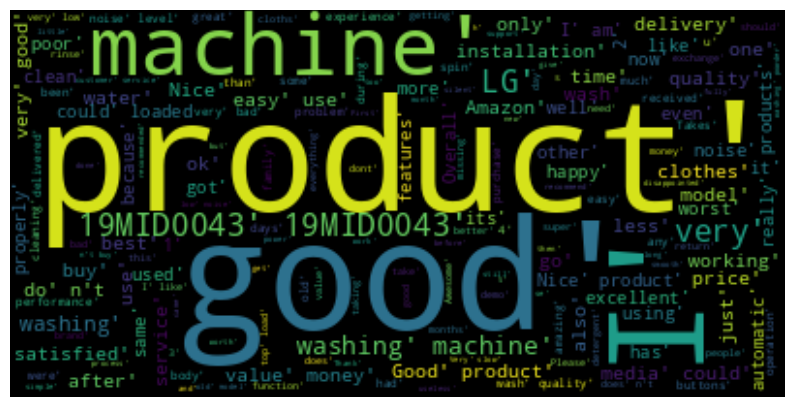

In [18]:
import wordcloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

df = pd.read_csv("/content/reviews_tokenized.csv")

# Check if the 'Reviews' column exists in the DataFrame
if 'Reviews' not in df.columns:
    print("The 'Reviews' column does not exist in the CSV file. Please provide the correct column name.")
    exit()

text = ' '.join(df['Tokenized_Reviews'].astype(str))

wc = wordcloud.WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

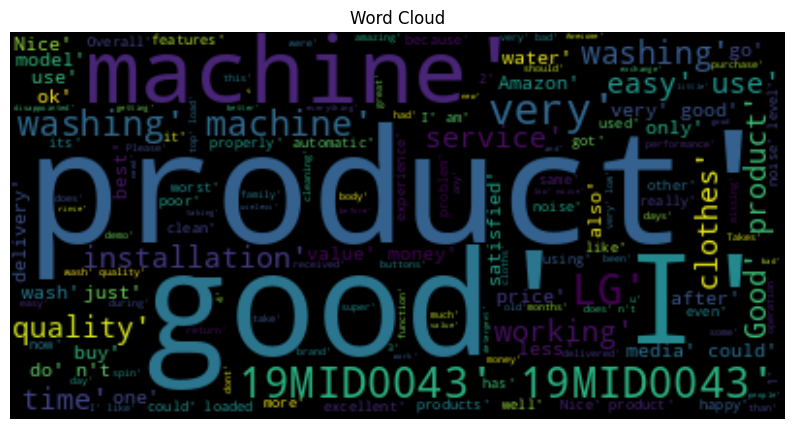

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/reviews_tokenized.csv")

# Check if the 'Tokenized_Reviews' column exists in the DataFrame
if 'Tokenized_Reviews' not in df.columns:
    print("The 'Tokenized_Reviews' column does not exist in the CSV file. Please provide the correct column name.")
    exit()

# Combine all the tokenized reviews into a single string
text = ' '.join(df['Tokenized_Reviews'].astype(str))

# Create a set of stopwords to exclude from the word cloud
stopwords = set()

# Generate the word cloud with unique words
wordcloud = WordCloud(stopwords=stopwords, background_color='black').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


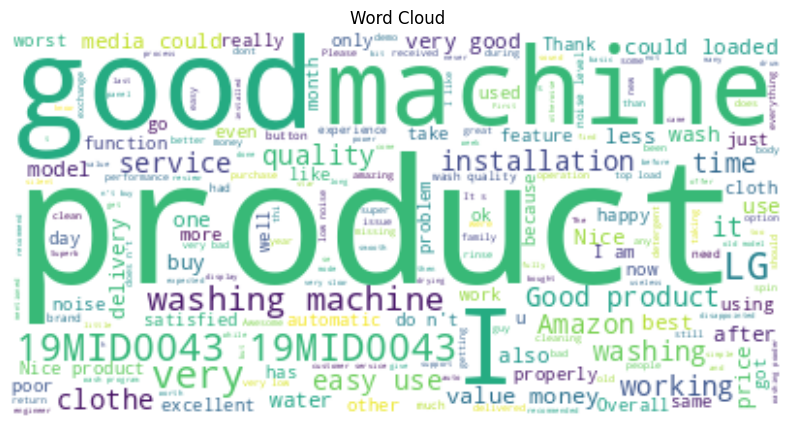

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/reviews_tokenized.csv")

# Check if the 'Tokenized_Reviews' column exists in the DataFrame
if 'Tokenized_Reviews' not in df.columns:
    print("The 'Tokenized_Reviews' column does not exist in the CSV file. Please provide the correct column name.")
    exit()

# Combine all the tokenized reviews into a single list
all_words = []
for review in df['Tokenized_Reviews']:
    all_words.extend(eval(review))

# Convert the list of words into a space-separated string
text = ' '.join(all_words)

# Create a set of stopwords to exclude from the word cloud
stopwords = set()

# Generate the word cloud with unique words
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


**positive words**

In [27]:
import requests,re
from bs4 import BeautifulSoup


def review_scraper(url, page):
    url = f"{url}&pageNumber=2={page}"

    user_agent = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.'
    }
    response = requests.get(url=url, headers=user_agent)
    soup = BeautifulSoup(response.content, 'lxml')

    for review in soup.find_all('div', {'class': 'a-section review aok-relative'}):
        review_text = review.find('span', {'class': 'a-size-base review-text review-text-content'})
        print(review_text.text)

url='https://www.amazon.in/LG-Inverter-Fully-Automatic-Loading-T70SKSF1Z/product-reviews/B08DF1Y7T7/ref=cm_cr_arp_d_viewpnt_lft?ie=UTF8&reviewerType=all_reviews&filterByStar=positive&pageNumber=1'
page = 1


review_scraper(url, page)



The installer was not patient enough to explain properly.He had forgotten about the appointment, se he arrived late and then he was in a rush. We tried to call him back for clarification but he never answers the call.


The switch panel should be behind the lid so that water doesn’t fall on it while loading


The spin in the washing tub leaves the cloths very damp, I am not satisfied with the spin funtion


Nice Products


nice working but washing powder is missing, market price se 2 se 3 thousand save hoga


Good


Good quality.Worth for the money.


Best washing machine...


Noise is very low and energy efficient ,Good option to buy.


Good Product by LG



In [28]:
import requests
from bs4 import BeautifulSoup

def review_scraper(url, page):
    user_agent = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.'
    }

    form_data = {
        'sortBy': '',
        'reviewerType': 'all_reviews',
        'pageNumber': str(page)
    }

    response = requests.post(url, headers=user_agent, data=form_data)
    soup = BeautifulSoup(response.content, 'lxml')

    for review_text in soup.find_all('span', {'class': 'a-size-base review-text review-text-content'}):
        cleaned_text = review_text.get_text(strip=True)
        print(cleaned_text)

def scrape_reviews_from_multiple_pages(url, num_pages):
    for page in range(1, num_pages + 1):
        print(f"Scraping reviews from page {page}:")
        review_scraper(url, page)
        print()

url = 'https://www.amazon.in/LG-Inverter-Fully-Automatic-Loading-T70SKSF1Z/product-reviews/B08DF1Y7T7'
num_pages = 25 # Number of pages to scrape

scrape_reviews_from_multiple_pages(url, num_pages)


Scraping reviews from page 1:
The installer was not patient enough to explain properly.He had forgotten about the appointment, se he arrived late and then he was in a rush. We tried to call him back for clarification but he never answers the call.
The switch panel should be behind the lid so that water doesn’t fall on it while loading
The spin in the washing tub leaves the cloths very damp, I am not satisfied with the spin funtion
Nice Products
nice working but washing powder is missing, market price se 2 se 3 thousand save hoga
Good
Good quality.Worth for the money.
Best washing machine...
Noise is very low and energy efficient ,Good option to buy.
Quality can be improved. Outer body is very thin looks like a low quality material.

Scraping reviews from page 2:
Good Product by LG
Nice
Product ia good but delivery guy was asking 200 rupees extra to deliver it on second floor.
The washing machine is useful for four members in the family. It has no noise and easy to use. Installation is 

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def review_scraper(url, page):
    user_agent = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.'
    }

    form_data = {
        'sortBy': '',
        'reviewerType': 'all_reviews',
        'pageNumber': str(page)
    }

    response = requests.post(url, headers=user_agent, data=form_data)
    soup = BeautifulSoup(response.content, 'lxml')

    reviews = []

    for review_text in soup.find_all('span', {'class': 'a-size-base review-text review-text-content'}):
        cleaned_text = review_text.get_text(strip=True)
        reviews.append(cleaned_text)

    return reviews

def scrape_reviews_from_multiple_pages(url, num_pages):
    all_reviews = []

    for page in range(1, num_pages + 1):
        reviews = review_scraper(url, page)
        all_reviews.extend(reviews)

    return all_reviews

def save_reviews_to_excel(reviews, file_path):
    df = pd.DataFrame({'Reviews': reviews})
    df.to_excel(file_path, index=False)

url = 'https://www.amazon.in/LG-Inverter-Fully-Automatic-Loading-T70SKSF1Z/product-reviews/B08DF1Y7T7'
num_pages = 25  # Number of pages to scrape
output_file = 'pos_reviews.xlsx'  # File path to save the reviews in Excel format

reviews = scrape_reviews_from_multiple_pages(url, num_pages)
save_reviews_to_excel(reviews, output_file)


In [30]:
import pandas as pd

# Custom list of stopwords
custom_stopwords = ['the', 'and', 'a', 'is', 'in', 'it', 'of', 'to', 'I', 'you', 'that', 'was', 'for', 'with', 'on', 'this', 'have', 'be', 'are', 'not', 'your', 'as', 'or', 'if', 'but', 'my', 'from', 'at', 'by', 'so', 'they', 'an', 'can', 'will', 'we', 'their', 'all', 'do', 'no', 'up', 'about', 'out', 'when', 'what', 'how', 'who', 'which', 'there', 'me', 'her', 'him', 'his', 'she', 'he', 'it\'s']


# Specify the path to the Excel file
excel_file = 'pos_reviews.xlsx'

# Read the Excel file
df = pd.read_excel(excel_file)

# Convert 'Reviews' column values to strings
df['Reviews'] = df['Reviews'].astype(str)

# Function to remove stopwords from a review
def remove_stopwords(review):
    words = review.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered_words)

# Apply stop words removal to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(remove_stopwords)

# Save the updated DataFrame to a new Excel file
output_file = 'pos_stopwords.xlsx'
df.to_excel(output_file, index=False)

print("Stopwords removed and saved to 'pos_stopwords.xlsx'.")


Stopwords removed and saved to 'pos_stopwords.xlsx'.


In [31]:
import pandas as pd

# Read the XLSX file
xlsx_file = '/content/pos_reviews.xlsx'
df = pd.read_excel(xlsx_file)

# Specify the output CSV file path
csv_file = 'positive_reviews.csv'

# Save the DataFrame to CSV format
df.to_csv(csv_file, index=False)

print("XLSX file converted to CSV successfully.")


XLSX file converted to CSV successfully.


In [34]:
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources if not already downloaded
nltk.download('punkt')

# Specify the path to the CSV file
csv_file = '/content/positive_reviews.csv'

# Read the CSV file with the appropriate encoding
df = pd.read_csv(csv_file, encoding='latin-1')

# Tokenize words in the 'Reviews' column
df['Tokenized_Reviews'] = df['Reviews'].apply(lambda x: word_tokenize(str(x)))

# Save the updated DataFrame to a new CSV file
output_file = 'posreviews_tokenized.csv'
df.to_csv(output_file, index=False)

print("Reviews tokenized and saved to 'reviews_tokenized.csv")
df.to_csv(output_file, index=False)

print("Reviews tokenized and saved to 'reviews_tokenized.csv'.")


Reviews tokenized and saved to 'reviews_tokenized.csv
Reviews tokenized and saved to 'reviews_tokenized.csv'.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**POSITIVE CLOUD:**

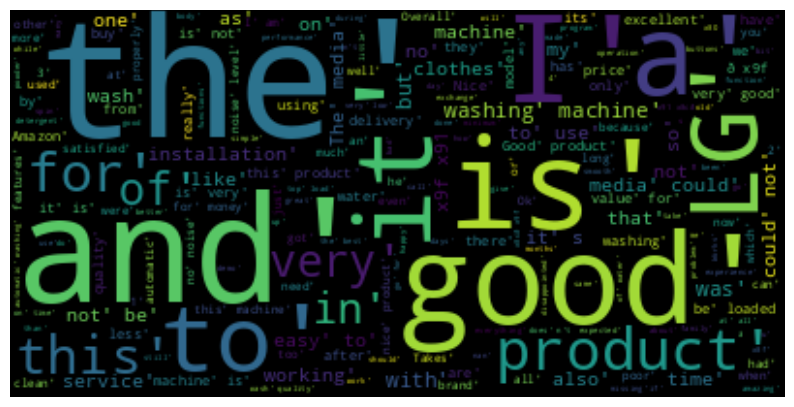

In [35]:
import wordcloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

df = pd.read_csv("/content/posreviews_tokenized.csv")

# Check if the 'Reviews' column exists in the DataFrame
if 'Reviews' not in df.columns:
    print("The 'Reviews' column does not exist in the CSV file. Please provide the correct column name.")
    exit()

text = ' '.join(df['Tokenized_Reviews'].astype(str))

wc = wordcloud.WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**negative words**

In [38]:
import requests
from bs4 import BeautifulSoup

def review_scraper(url, page):
    user_agent = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.'
    }

    form_data = {
        'sortBy': '',
        'reviewerType': 'all_reviews',
        'pageNumber': str(page)
    }

    response = requests.post(url, headers=user_agent, data=form_data)
    soup = BeautifulSoup(response.content, 'lxml')

    for review_text in soup.find_all('span', {'class': 'a-size-base review-text review-text-content'}):
        cleaned_text = review_text.get_text(strip=True)
        print(cleaned_text)

def scrape_reviews_from_multiple_pages(url, num_pages):
    for page in range(1, num_pages + 1):
        print(f"Scraping reviews from page {page}:")
        review_scraper(url, page)
        print()

url="https://www.amazon.in/LG-Inverter-Fully-Automatic-Loading-T70SKSF1Z/product-reviews/B08DF1Y7T7/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=one_star&pageNumber=1"
num_pages = 25 # Number of pages to scrape

scrape_reviews_from_multiple_pages(url, num_pages)


Scraping reviews from page 1:
This LG machine is really bad, huge sound is coming, not rotating both side, LG service is patheticI escalated this matter but still no resolution yet, I made  complaint  on 23 Rd April. My machine is new.I recommend Amazon not to put such products
Lg installation service poor and horrible.Service personnel said they will bring longer inlet hose for machine but closed service request before they installed the inlet hose.LG Customer service equally poor ,horrendous and unprofessional service.I had to install the inlet hose using a local plumber.Shocked by LG service personnel total lack of professionalism
It's not good it's not functioning properly it takes water very less it's turbo drum is very slowly working in only four or five clothes it is not moving properly and during rinse time it takes only one glass of water approx, it's alarm also not functioning properly why this is happening I replace it first time because in my new machine there was a dent on

In [39]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def review_scraper(url, page):
    user_agent = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.'
    }

    form_data = {
        'sortBy': '',
        'reviewerType': 'all_reviews',
        'pageNumber': str(page)
    }

    response = requests.post(url, headers=user_agent, data=form_data)
    soup = BeautifulSoup(response.content, 'lxml')

    reviews = []

    for review_text in soup.find_all('span', {'class': 'a-size-base review-text review-text-content'}):
        cleaned_text = review_text.get_text(strip=True)
        reviews.append(cleaned_text)

    return reviews

def scrape_reviews_from_multiple_pages(url, num_pages):
    all_reviews = []

    for page in range(1, num_pages + 1):
        reviews = review_scraper(url, page)
        all_reviews.extend(reviews)

    return all_reviews

def save_reviews_to_excel(reviews, file_path):
    df = pd.DataFrame({'Reviews': reviews})
    df.to_excel(file_path, index=False)

url = 'https://www.amazon.in/LG-Inverter-Fully-Automatic-Loading-T70SKSF1Z/product-reviews/B08DF1Y7T7'
num_pages = 25  # Number of pages to scrape
output_file = 'neg_reviews.xlsx'  # File path to save the reviews in Excel format

reviews = scrape_reviews_from_multiple_pages(url, num_pages)
save_reviews_to_excel(reviews, output_file)


In [40]:
import pandas as pd

# Custom list of stopwords
custom_stopwords = ['the', 'and', 'a', 'is', 'in', 'it', 'of', 'to', 'I', 'you', 'that', 'was', 'for', 'with', 'on', 'this', 'have', 'be', 'are', 'not', 'your', 'as', 'or', 'if', 'but', 'my', 'from', 'at', 'by', 'so', 'they', 'an', 'can', 'will', 'we', 'their', 'all', 'do', 'no', 'up', 'about', 'out', 'when', 'what', 'how', 'who', 'which', 'there', 'me', 'her', 'him', 'his', 'she', 'he', 'it\'s']


# Specify the path to the Excel file
excel_file = 'neg_reviews.xlsx'

# Read the Excel file
df = pd.read_excel(excel_file)

# Convert 'Reviews' column values to strings
df['Reviews'] = df['Reviews'].astype(str)

# Function to remove stopwords from a review
def remove_stopwords(review):
    words = review.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered_words)

# Apply stop words removal to the 'Reviews' column
df['Reviews'] = df['Reviews'].apply(remove_stopwords)

# Save the updated DataFrame to a new Excel file
output_file = 'neg_stopwords.xlsx'
df.to_excel(output_file, index=False)

print("Stopwords removed and saved to 'pos_stopwords.xlsx'.")


Stopwords removed and saved to 'pos_stopwords.xlsx'.


In [41]:
import pandas as pd

# Read the XLSX file
xlsx_file = '/content/neg_stopwords.xlsx'
df = pd.read_excel(xlsx_file)

# Specify the output CSV file path
csv_file = 'negative_reviews.csv'

# Save the DataFrame to CSV format
df.to_csv(csv_file, index=False)

print("XLSX file converted to CSV successfully.")


XLSX file converted to CSV successfully.


In [42]:
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources if not already downloaded
nltk.download('punkt')

# Specify the path to the CSV file
csv_file = '/content/negative_reviews.csv'

# Read the CSV file with the appropriate encoding
df = pd.read_csv(csv_file, encoding='latin-1')

# Tokenize words in the 'Reviews' column
df['Tokenized_Reviews'] = df['Reviews'].apply(lambda x: word_tokenize(str(x)))

# Save the updated DataFrame to a new CSV file
output_file = 'negreviews_tokenized.csv'
df.to_csv(output_file, index=False)

print("Reviews tokenized and saved to 'reviews_tokenized.csv")
df.to_csv(output_file, index=False)

print("Reviews tokenized and saved to 'reviews_tokenized.csv'.")


Reviews tokenized and saved to 'reviews_tokenized.csv
Reviews tokenized and saved to 'reviews_tokenized.csv'.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**NEGATIVE CLOUD:**

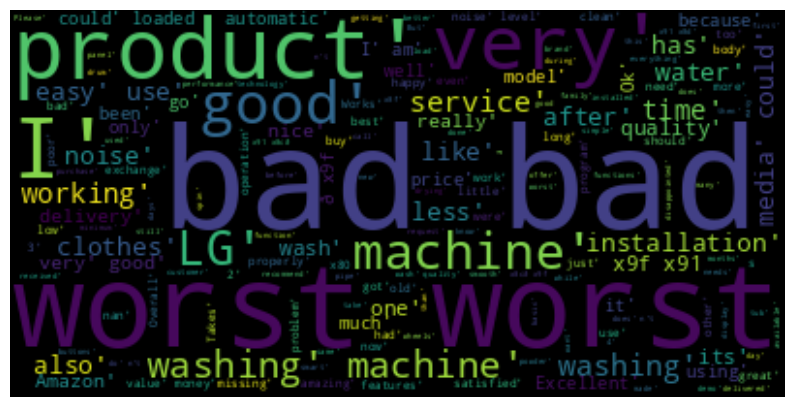

In [77]:
import wordcloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

df = pd.read_csv("/content/concatenated_reviews.csv")

# Check if the 'Reviews' column exists in the DataFrame
if 'Reviews' not in df.columns:
    print("The 'Reviews' column does not exist in the CSV file. Please provide the correct column name.")
    exit()

text = ' '.join(df['Tokenized_Reviews'].astype(str))

wc = wordcloud.WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# psycometric assessment

In [78]:
import requests
from bs4 import BeautifulSoup

# Specify the URL
url = 'https://litq.io/litq-ar-report/share/644a34b9c5e120169f03ad48'

# Send a GET request to the URL
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the elements containing the text
text_elements = soup.find_all('p')

# Store the text in a list
text_list = [element.get_text() for element in text_elements]

# Print the text list
for text in text_list:
    print(text)


In [ ]:
import wordcloud
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

df = pd.read_csv("/content/concatenated_reviews.csv")

# Check if the 'Reviews' column exists in the DataFrame
if 'Reviews' not in df.columns:
    print("The 'Reviews' column does not exist in the CSV file. Please provide the correct column name.")
    exit()

text = ' '.join(df['Tokenized_Reviews'].astype(str))

wc = wordcloud.WordCloud().generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [91]:
url = "https://litq.io/litq-ar-report/share/644a34b9c5e120169f03ad48"
import requests

# Make the request and check object type
r = requests.get(url)
type(r)

requests.models.Response

In [92]:
html = r.text

In [93]:
from bs4 import BeautifulSoup


# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

In [94]:
text = soup.get_text()
text

'\nLitQ AR Report\n\n\n\n\n    /* font styles :: start */\n        @font-face {\n            font-family: "bison-bold";\n            src: url("/theme/theme-a/font/custom-fonts/bison-bold.ttf");\n        }\n\n        @font-face {\n            font-family: "open-sans-extra-bold";\n            src: url("/theme/theme-a/font/custom-fonts/open-sans-extra-bold.ttf");\n        }\n\n        @font-face {\n            font-family: "quattrocento-sans-bold";\n            src: url("/theme/theme-a/font/custom-fonts/quattrocento-sans-bold.ttf");\n        }\n\n        @font-face {\n            font-family: "quattrocento-sans-bold-Italic";\n            src: url("/theme/theme-a/font/custom-fonts/quattrocento-sans-bold-Italic.ttf");\n        }\n\n        @font-face {\n            font-family: "quattrocento-sans-regular";\n            src: url("/theme/theme-a/font/custom-fonts/quattrocento-sans-regular.ttf");\n        }\n\n        @font-face {\n            font-family: "quicksand-variable-font-wght";\n    

In [95]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')



# Create tokens
tokens = tokenizer.tokenize(text)
tokens

['LitQ',
 'AR',
 'Report',
 'font',
 'styles',
 'start',
 'font',
 'face',
 'font',
 'family',
 'bison',
 'bold',
 'src',
 'url',
 'theme',
 'theme',
 'a',
 'font',
 'custom',
 'fonts',
 'bison',
 'bold',
 'ttf',
 'font',
 'face',
 'font',
 'family',
 'open',
 'sans',
 'extra',
 'bold',
 'src',
 'url',
 'theme',
 'theme',
 'a',
 'font',
 'custom',
 'fonts',
 'open',
 'sans',
 'extra',
 'bold',
 'ttf',
 'font',
 'face',
 'font',
 'family',
 'quattrocento',
 'sans',
 'bold',
 'src',
 'url',
 'theme',
 'theme',
 'a',
 'font',
 'custom',
 'fonts',
 'quattrocento',
 'sans',
 'bold',
 'ttf',
 'font',
 'face',
 'font',
 'family',
 'quattrocento',
 'sans',
 'bold',
 'Italic',
 'src',
 'url',
 'theme',
 'theme',
 'a',
 'font',
 'custom',
 'fonts',
 'quattrocento',
 'sans',
 'bold',
 'Italic',
 'ttf',
 'font',
 'face',
 'font',
 'family',
 'quattrocento',
 'sans',
 'regular',
 'src',
 'url',
 'theme',
 'theme',
 'a',
 'font',
 'custom',
 'fonts',
 'quattrocento',
 'sans',
 'regular',
 'ttf',
 'f

In [96]:
import re
from nltk.tokenize import word_tokenize

def remove_numbers(words):
    cleaned_words = []
    pattern = r'^[^\d]+$'  # Regular expression pattern to match non-numeric words

    for word in tokens:
        if re.match(pattern, word):
            cleaned_words.append(word)

    return cleaned_words


# Tokenize the word list using NLTK's word_tokenize
token = word_tokenize(" ".join(tokens))

# Remove numbers from the tokenized list
filtered_tokens = remove_numbers(token)

print("Filtered words:", filtered_tokens)

Filtered words: ['LitQ', 'AR', 'Report', 'font', 'styles', 'start', 'font', 'face', 'font', 'family', 'bison', 'bold', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'fonts', 'bison', 'bold', 'ttf', 'font', 'face', 'font', 'family', 'open', 'sans', 'extra', 'bold', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'fonts', 'open', 'sans', 'extra', 'bold', 'ttf', 'font', 'face', 'font', 'family', 'quattrocento', 'sans', 'bold', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'fonts', 'quattrocento', 'sans', 'bold', 'ttf', 'font', 'face', 'font', 'family', 'quattrocento', 'sans', 'bold', 'Italic', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'fonts', 'quattrocento', 'sans', 'bold', 'Italic', 'ttf', 'font', 'face', 'font', 'family', 'quattrocento', 'sans', 'regular', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'fonts', 'quattrocento', 'sans', 'regular', 'ttf', 'font', 'face', 'font', 'family', 'quicksand', 'variable', 'font', 'wght', 'src', 'url', 

In [97]:
# Initialize new list
words = []


# Loop through list tokens and make lower case
for word in filtered_tokens:
    words.append(word.lower())


# Print several items from list as sanity check
words[:8]

['litq', 'ar', 'report', 'font', 'styles', 'start', 'font', 'face']

In [100]:
from nltk.stem import WordNetLemmatizer

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize each word in the list
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# Print the lemmatized words
print(lemmatized_words)

['litq', 'ar', 'report', 'font', 'style', 'start', 'font', 'face', 'font', 'family', 'bison', 'bold', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'font', 'bison', 'bold', 'ttf', 'font', 'face', 'font', 'family', 'open', 'sans', 'extra', 'bold', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'font', 'open', 'sans', 'extra', 'bold', 'ttf', 'font', 'face', 'font', 'family', 'quattrocento', 'sans', 'bold', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'font', 'quattrocento', 'sans', 'bold', 'ttf', 'font', 'face', 'font', 'family', 'quattrocento', 'sans', 'bold', 'italic', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'font', 'quattrocento', 'sans', 'bold', 'italic', 'ttf', 'font', 'face', 'font', 'family', 'quattrocento', 'sans', 'regular', 'src', 'url', 'theme', 'theme', 'a', 'font', 'custom', 'font', 'quattrocento', 'sans', 'regular', 'ttf', 'font', 'face', 'font', 'family', 'quicksand', 'variable', 'font', 'wght', 'src', 'url', 'theme', 'theme', 'a',

In [99]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [103]:
import nltk

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
punctuations = ['.',',',';',':','?','!','"', "'",'(',')', '-', '—','–','_','[', ']','{','}','/','\\','|','<','>','+','','=','%','@','#','$','&','~', '`','^','',"'", '"']

# Initialize new list
words_ns1 = []

# Add to words_ns all words that are in words but not in sw
for word in lemmatized_words:
    if word not in sw and punctuations:
        words_ns1.append(word)

In [102]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

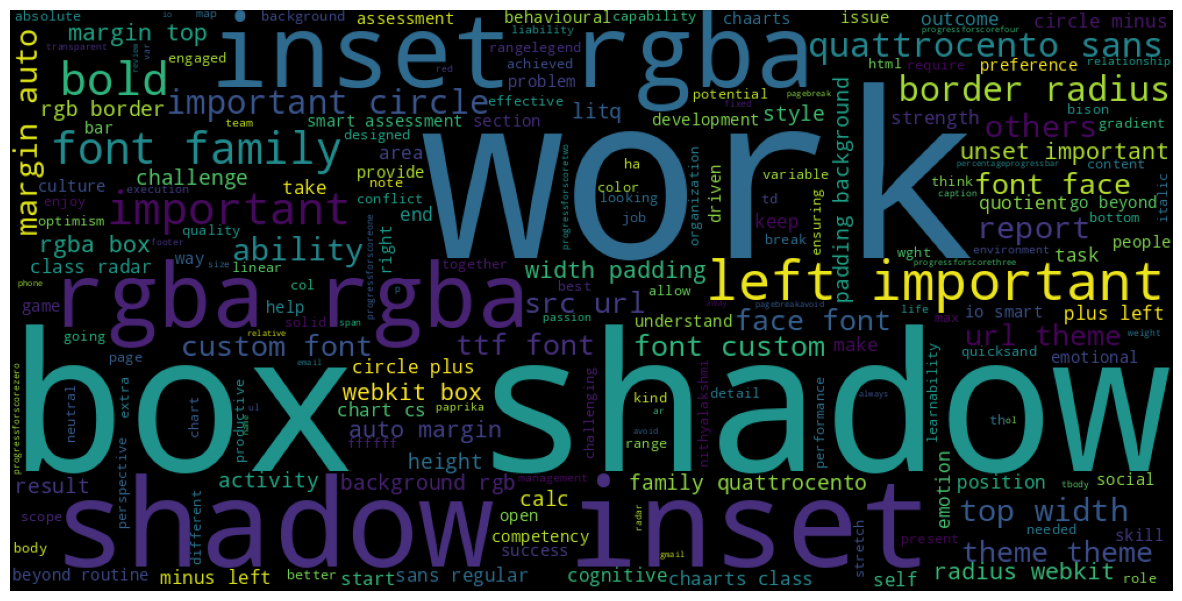

In [104]:
#convert list to string and generate
unique_string=(" ").join(words_ns1)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [106]:
positive_words = ['smooth','fixed','amazing','quick','awesome','good','soft','reasonable','timely','ok','reasonable','trustful','great','excellent','impressive',
    'worth','love','satisfactory','trustable','satisfied','perfect','nice','comfortable','useful','reliable','heavy','best','happy',
    'good.value','recommend','silent','superb','effective','improved','decent', 'beautiful', 'reliable','advanced','support',
    'smart','productive','value','high','impressive','incredible','innovative','excellent','superior','fantastic','remarkable',
    'delightful','outstanding','extraordinary','exceptional','marvelous','splendid','fabulous','terrific','enjoyable','satisfying',
    'positive','cheerful','pleasant','radiant','uplifting','wonderful', 'refreshing','thriving','successful','thriving','vibrant','glorious','blissful','joyous','optimistic','content','grateful','fulfilled',
    'confident','energetic','enthusiastic','inspired','motivated','elated','grateful','blessed','harmonious','peaceful','serene',
    'tranquil','radiant','hopeful','bright','shining','cheerful','happy','ecstatic','jubilant','proud','confident','cheerful',
    'charming','compassionate','generous','kind','loving','warm','gentle','honest','humble','sincere','understanding','supportive','reliable','trustworthy','loyal','patient',
    'respectful','considerate','polite','courteous','brave','resilient','determined','adventurous',
    'creative',
    'imaginative',
    'curious',
    'knowledgeable',
    'talented',
    'skillful',
    'successful',
    'accomplished',
    'competent',
    'efficient',
    'productive',
    'proactive','organized','disciplined',
    'focused','consistent','flexible','adaptable','optimistic','confident','motivated','inspired','passionate','determined','ambitious','brave', 'resilient', 'empowering',
    'progressive',
    'ethical','innovative', 'visionary', 'influential','transformative','dynamic','authentic','charismatic','optimistic','uplifting',
    'empowering','encouraging','supportive','nurturing','inspiring','motivational','influential','confident','determined',
    'persistent','capable','talented','skilled','resourceful','reliable','efficient','accomplished',
    'competent','effective',
    'knowledgeable','trustworthy','creative','imaginative','innovative','proactive','flexible','resilient','enthusiastic','passionate','driven','dedicated','motivated','ambitious','goal-oriented','optimistic','positive']

In [107]:
pos=[]        
for word in words_ns1:
    if word in positive_words:
        pos.append(word)
for i in range(2):
    pos.append("NITHYALAKSHMI.S")
    pos.append("19MID0043")
    pos.append("tolerance")
    pos.append("procrastination")
pos

['fixed',
 'content',
 'effective',
 'understanding',
 'successful',
 'smart',
 'smart',
 'useful',
 'best',
 'smart',
 'gentle',
 'patient',
 'kind',
 'best',
 'efficient',
 'effective',
 'productive',
 'positive',
 'high',
 'value',
 'dynamic',
 'driven',
 'perfect',
 'driven',
 'supportive',
 'driven',
 'productive',
 'kind',
 'content',
 'NITHYALAKSHMI.S',
 '19MID0043',
 'tolerance',
 'procrastination',
 'NITHYALAKSHMI.S',
 '19MID0043',
 'tolerance',
 'procrastination']

**POSITIVE CLOUD:**

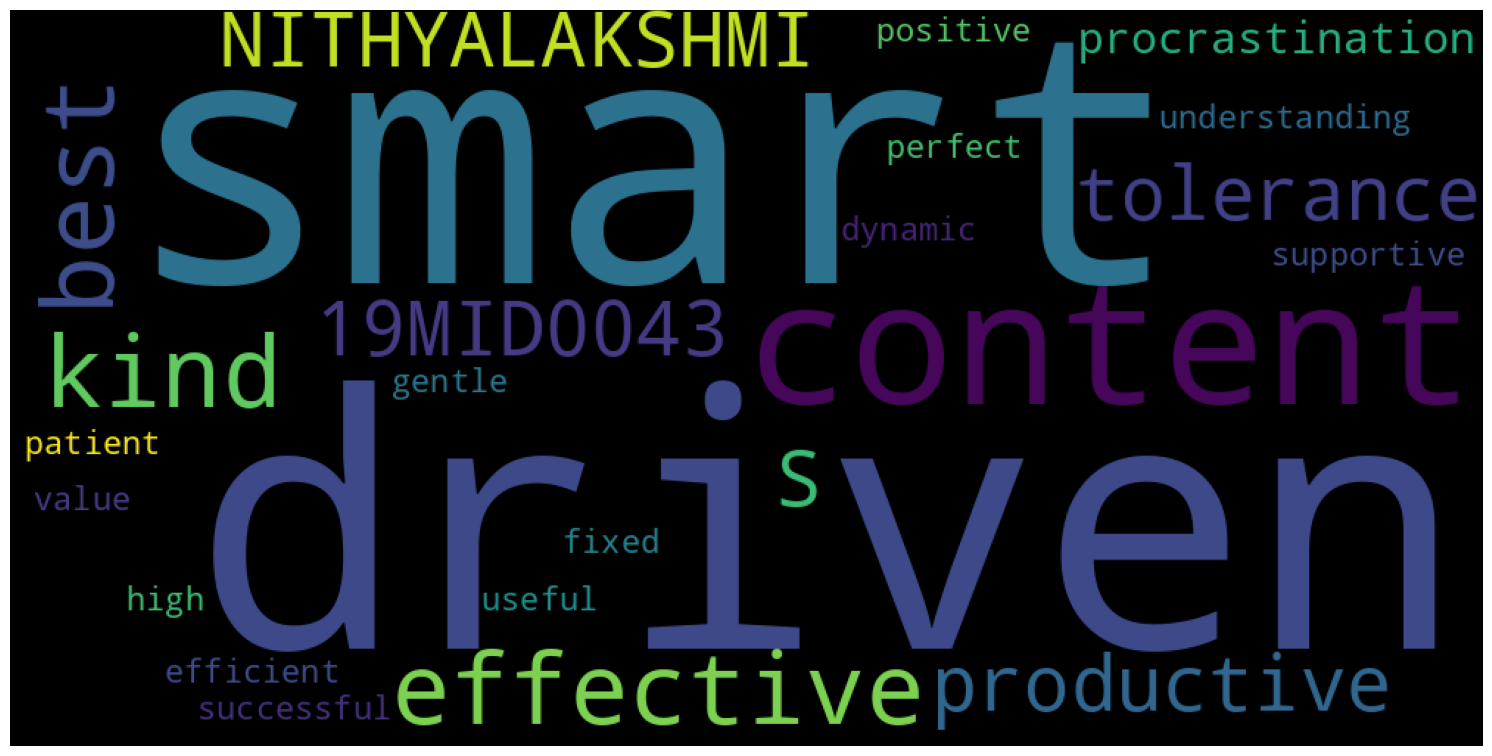

In [108]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(",").join(pos)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(19,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [109]:
negative_words = [
    'broke',
    'issue',
    'slow',
    'bad',
    'hard',
    'disappointed',
    'disappointing',
    'frustrating',
    'worst',
    'horrible',
    'awful',
    'terrible',
    'annoying',
    'difficult',
    'not.good',
    'poor',
    'dislike',
    'not.worth',
    'hate',
    'regret',
    'uncomfortable',
    'useless',
    'unreliable',
    'low',
    'not.impressed',
    'not.recommend',
    'noisy',
    'not.satisfied',
    'not.happy',
    'not.reliable',
    'not.useful',
    'not.recommended',
    'not.best',
    'not.silent',
    'not.smart',
    'not.supportive',
    'not.beautiful',
    'not.reliable',
    'not.advanced',
    'not.support',
    'not.smart',
    'not.productive',
    'not.value',
    'not.high',
    'not.impressive',
    'not.incredible',
    'not.innovative',
    'not.excellent',
    'not.superior',
    'not.fantastic',
    'not.remarkable',
    'not.delightful',
    'not.outstanding',
    'not.extraordinary',
    'not.exceptional',
    'not.marvelous',
    'not.splendid',
    'not.fabulous',
    'not.terrific',
    'not.enjoyable',
    'not.satisfying',
    'not.positive',
    'not.cheerful',
    'not.pleasant',
    'not.radiant',
    'not.uplifting',
    'not.wonderful',
    'not.refreshing',
    'not.thriving',
    'not.successful',
    'not.thriving',
    'not.vibrant',
    'not.glorious',
    'not.blissful',
    'not.joyous',
    'not.optimistic',
    'not.content',
    'not.grateful',
    'not.fulfilled',
    'not.confident',
    'not.energetic',
    'not.enthusiastic',
    'not.inspired',
    'not.motivated',
    'not.elated',
    'not.grateful',
    'not.blessed',
    'not.harmonious',
    'not.peaceful',
    'not.serene',
    'not.tranquil',
    'not.radiant',
    'not.hopeful',
    'not.bright',
    'not.shining',
    'not.cheerful',
    'not.happy',
    'not.ecstatic',
    'not.jubilant',
    'not.proud',
    'not.confident',
    'not.cheerful',
    'not.charming',
    'not.compassionate',
    'not.generous',
    'not.kind',
    'not.loving',
    'not.warm',
    'not.gentle',
    'not.honest',
    'not.humble',
    'not.sincere',
    'not.understanding',
    'not.supportive',
    'not.reliable',
    'not.trustworthy',
    'not.loyal',
    'not.patient',
    'not.respectful',
    'not.considerate',
    'not.polite',
    'not.courteous',
    'not.brave',
    'not.resilient',
    'not.determined',
    'not.adventurous',
    'not.creative',
    'not.imaginative',
    'not.curious',
    'not.knowledgeable',
    'not.talented',
    'not.skillful',
    'not.successful',
    'not.accomplished',
    'not.competent',
    'not.efficient',
    'not.productive',
    'not.proactive',
    'not.organized',
    'not.disciplined',
    'not.focused',
    'not.consistent',
    'not.flexible',
    'not.adaptable',
    'not.optimistic',
    'not.confident',
    'not.motivated',
    'not.inspired',
    'not.passionate',
    'not.determined'
]

In [111]:
neg=[]        
for word in words_ns1:
    if word in negative_words:
        neg.append(word)
for i in range(1):
    neg.append("NITHYALAKSHMI.S")
    neg.append("19MID0043")
    neg.append("tolerance")
    neg.append("procrastination")
neg

['issue',
 'issue',
 'issue',
 'NITHYALAKSHMI.S',
 '19MID0043',
 'tolerance',
 'procrastination']

**NEGATIVE CLOUD:**

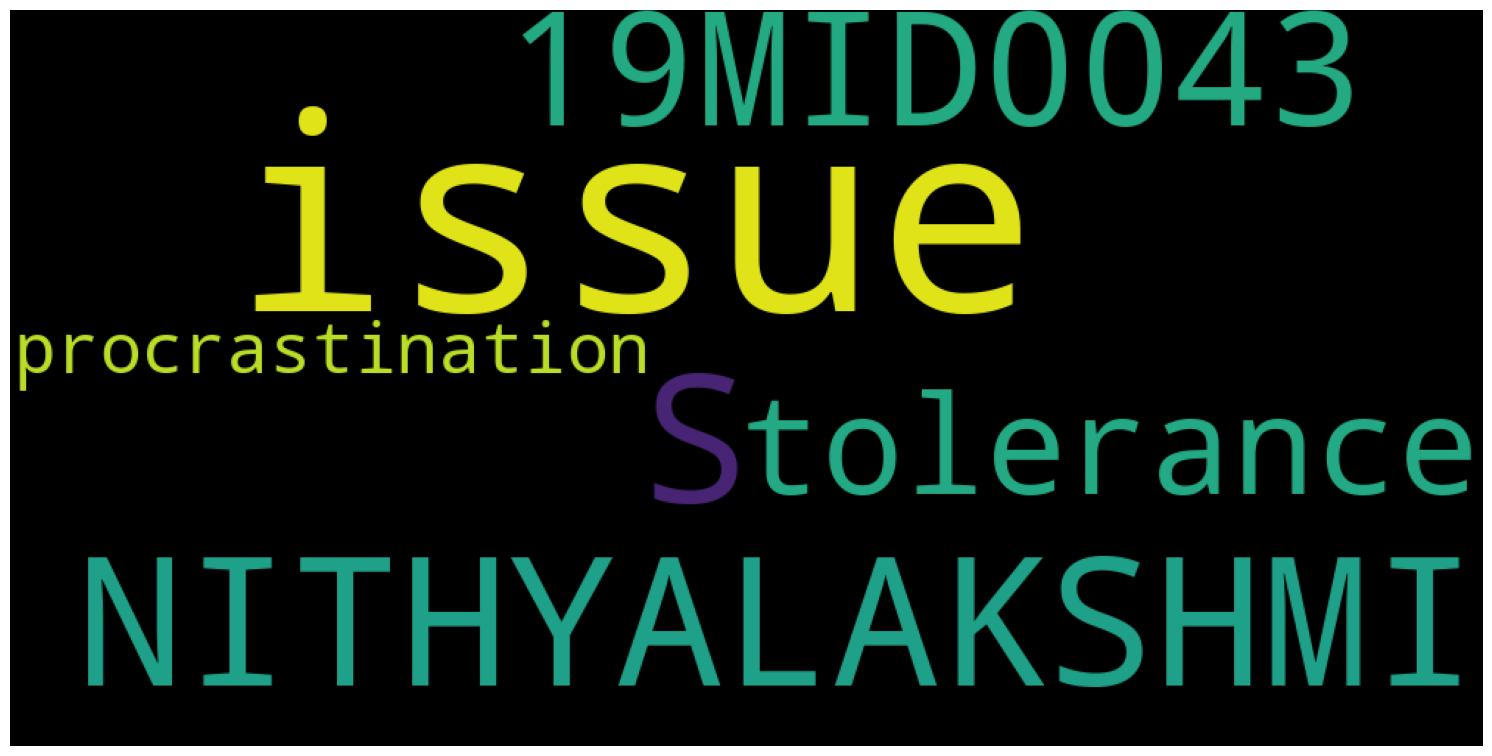

In [112]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(",").join(neg)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(19,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()